In [81]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
# Import datasets
df = pd.read_csv("Mental Health Dataset.csv")

We would like to use this dataset to gain a better understanding of how different factors can affect a persons mental health. 
We would also like to gain an overview of general tendencies in different countries. 

In [83]:
# Removing unnecessary columns 
df.drop(axis=1, columns=["Timestamp"], inplace=True)

In [84]:
# Analyzing null values 
df.info()
df["self_employed"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   292364 non-null  object
 1   Country                  292364 non-null  object
 2   Occupation               292364 non-null  object
 3   self_employed            287162 non-null  object
 4   family_history           292364 non-null  object
 5   treatment                292364 non-null  object
 6   Days_Indoors             292364 non-null  object
 7   Growing_Stress           292364 non-null  object
 8   Changes_Habits           292364 non-null  object
 9   Mental_Health_History    292364 non-null  object
 10  Mood_Swings              292364 non-null  object
 11  Coping_Struggles         292364 non-null  object
 12  Work_Interest            292364 non-null  object
 13  Social_Weakness          292364 non-null  object
 14  mental_health_interv

No     257994
Yes     29168
Name: self_employed, dtype: int64

In [85]:
# Replacing null values with "no", because it is most likely to be "no" 
df["self_employed"].fillna("No", inplace=True)

In [116]:
# Analyzing the data structure
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,239850,171308,66351,263196,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


Most partipants are men, from USA and are currently in treatment. Most common occupation is house-wife

In [126]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indicies = shuffled_indices[:test_set_size]
    train_indicies = shuffled_indices[test_set_size:]
    return data.iloc[train_indicies], data.iloc[test_indicies]

In [112]:
train_set, test_set = split_train_test(df, 0.2)
train_set_copy = train_set.copy()

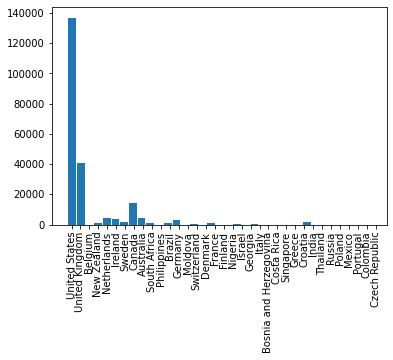

In [127]:
histPlot = plt.hist(train_set["Country"], edgecolor='white', bins=35, align="left")
plt.xticks(rotation='vertical')
plt.show()

In [110]:
from sklearn.preprocessing import OrdinalEncoder

In [129]:
# Endcoding text to numbers
ordinal_encoder = OrdinalEncoder()

# Gender
df_gender = train_set_copy[["Gender"]]
df_gender_encoded = ordinal_encoder.fit_transform(df_gender)
df_gender_encoded[:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])